In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, cross_val_predict, validation_curve
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('./data_train.csv')  # Dataset - Healthy lung COPD Data
df.shape
df.head()

,ho,khac_dam,kho_khe,kho_tho,nang_nguc,mrc,thuoc_la,mui_hong,tim,phoi,nhom
0,2,2,2,1,1,3,1,0,0,2,D
1,1,1,0,0,1,1,1,0,0,2,A
2,0,0,1,1,0,2,1,0,0,2,B
3,2,2,2,2,0,2,1,0,0,3,D
4,2,2,1,2,0,2,1,0,0,3,D


In [ ]:
df1 = df.drop('nhom', axis=1)
df2 = df

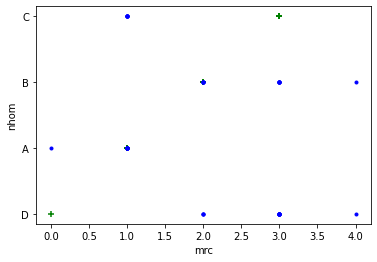

In [ ]:
plt.xlabel('mrc')
plt.ylabel('nhom')
plt.scatter(df1['mrc'], df1['mrc'], color='green', marker='+')
plt.scatter(df2['mrc'], df2['nhom'], color='blue', marker='.')

In [ ]:
X = df.drop(['nhom'], axis='columns')
X.head()

,ho,khac_dam,kho_khe,kho_tho,nang_nguc,mrc,thuoc_la,mui_hong,tim,phoi
0,2,2,2,1,1,3,1,0,0,2
1,1,1,0,0,1,1,1,0,0,2
2,0,0,1,1,0,2,1,0,0,2
3,2,2,2,2,0,2,1,0,0,3
4,2,2,1,2,0,2,1,0,0,3


In [ ]:
y = df['nhom']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(len(X_train))
print(len(X_test))

32
9


In [ ]:
model = SVC(kernel='linear')
cv_results = cross_validate(model, X, y, cv = 5)
sorted(cv_results.keys())
cv_results['test_score']

array([0.88888889, 0.875     , 0.75      , 0.875     , 0.625     ])

In [ ]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = model.predict(X_test)
print(predictions)

['B' 'A' 'D' 'B' 'B' 'D' 'D' 'D' 'D']


In [ ]:
percentage = cross_val_score(model, X, y, cv=5)

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[1 0 0]
 [0 2 0]
 [0 1 5]]
Test Set: 9
Accuracy: 0.80 (+/- 0.20)


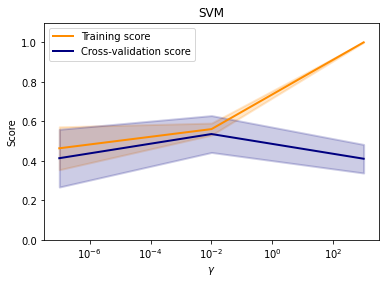

In [ ]:
param_range = np.logspace(-7, 3, 3)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()